In [10]:
from archetypal import IDF

idf = IDF("badgeo.idf")


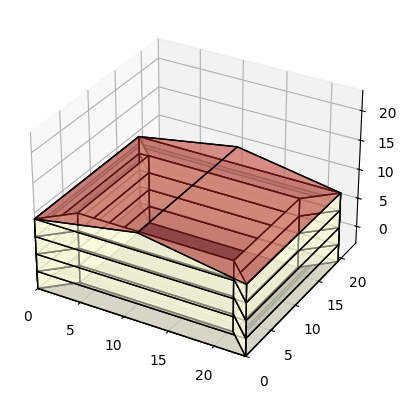

(<Figure size 640x480 with 1 Axes>, [<Axes3D: >])

In [11]:
idf.view_model()

61.12079999875277
48.82101899944246
61.12079999875277
48.82101899944246
230.61148522405273


['Block Perimeter_Zone_1 Storey 3 Roof 0001_1',
 'Block Perimeter_Zone_2 Storey 3 Roof 0001_1',
 'Block Perimeter_Zone_3 Storey 3 Roof 0001_1',
 'Block Perimeter_Zone_4 Storey 3 Roof 0001_1',
 'Block Core_Zone Storey 3 Roof 0001_1']

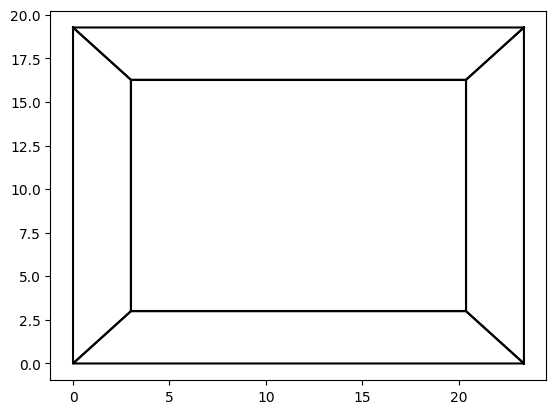

In [18]:
import matplotlib.pyplot as plt
from geomeppy.geom.polygons import Polygon2D

srfs = [
    srf
    for srf in idf.idfobjects["BUILDINGSURFACE:DETAILED"]
    if "attic" in srf.Zone_Name.lower() and srf.Surface_Type == "Floor"
]
srf_coords = [srf.coords for srf in srfs]
polys = [Polygon2D(coords) for coords in srf_coords]


fig, ax = plt.subplots()
for poly in polys:
    print(poly.area)
    x_coords = [coord[0] for coord in poly.vertices] + [poly.vertices[0][0]]
    y_coords = [coord[1] for coord in poly.vertices] + [poly.vertices[0][1]]
    ax.plot(x_coords, y_coords, color="black")

[srf.Outside_Boundary_Condition_Object for srf in srfs]

In [9]:
srfs[3]


BUILDINGSURFACE:DETAILED,
    attic_bottom_plane_4,     !- Name
    Floor,                    !- Surface Type
    Project Floor,            !- Construction Name
    Attic,                    !- Zone Name
    ,                         !- Space Name
    outdoors,                 !- Outside Boundary Condition
    ,                         !- Outside Boundary Condition Object
    SunExposed,               !- Sun Exposure
    WindExposed,              !- Wind Exposure
    autocalculate,            !- View Factor to Ground
    4,                        !- Number of Vertices
    20.3736,                  !- Vertex 1 Xcoordinate
    16.273673,                !- Vertex 1 Ycoordinate
    9,                        !- Vertex 1 Zcoordinate
    20.3736,                  !- Vertex 2 Xcoordinate
    3,                        !- Vertex 2 Ycoordinate
    9,                        !- Vertex 2 Zcoordinate
    23.373599999584258,       !- Vertex 3 Xcoordinate
    4.157421e-10,             !- Vertex 3 Ycoo